In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

In [3]:
def derive(func, input_: np.ndarray, delta: float = 0.001) -> np.ndarray:
    '''
    Ermittelt die Ableitung einer Funktion "func" für jedes Element im Array "input_".
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

In [4]:
def leaky_relu(x):
    return np.where(x > 0, x, x * 0.01)    

def sigmoid(x):
    return 1 /(1+ np.exp(-x))

def square(x):
    return np.power(x,2)

def softmax(x):
  return np.log(1 + np.exp(x))    

def relu(x):
  return max(0,x) 

In [5]:
def sigmoid_square_leakyRelu(x):
    return sigmoid(square(leaky_relu(x)))

x, y = sy.symbols('x y')
sy.diff(x**2,x)    



2*x

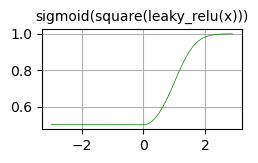

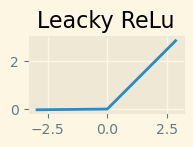

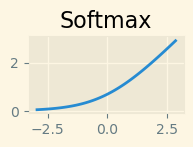

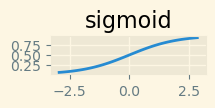

In [6]:
x = np.arange(-3,3,0.1)
y = sigmoid(square(leaky_relu(x)))


# Plotting a figure of width _ and height _
plt_1 = plt.figure(figsize=(2, 1))
axes= plt_1.add_axes([-1,2,1,1])

plt.title("sigmoid(square(leaky_relu(x)))", fontsize = 10)
plt.style.use('Solarize_Light2')
plt.plot(x,y, color='green',  linewidth=0.5)
plt.grid(True)

plt_2 = plt.figure(figsize=(2, 1))
plt.title("Leacky ReLu")
plt.plot(x,leaky_relu(x))
plt.grid(True)

plt_3 = plt.figure(figsize=(2, 1))
plt.title("Softmax")
plt.plot(x,softmax(x))
plt.grid(True)

plt_4 = plt.figure(figsize=(2, 0.5))
plt.title("sigmoid")
plt.plot(x,sigmoid(x))
plt.grid(True)

plt.show()

In [7]:
def chain_derive_3(chain: list, input_range: np.ndarray) -> np.ndarray:
    '''
    Verwendet die Kettenregel, um drei ineinander verschachtelte Funktionen zu berechnen

    (f3(f2(f1(x))))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
                     = äussere      mal  innere
                     =                   äussere mal innere
    '''

    assert len(chain) == 3,'This function requires object to have length of 3'

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    #df3du
    df3_du = derive(f3, f2_of_x)

    #df2du
    df2_du = derive(f2, f1_of_x)

    #df1du
    df1_du = derive(f1, input_range)

    return df1_du * df2_du * df3_du

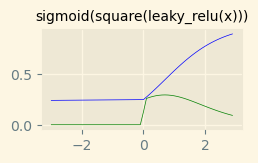

In [15]:
PLOT_RANGE = np.arange(-3,3,0.1)
chain = [leaky_relu, sigmoid, square]

y_chain_derive = chain_derive_3(chain, PLOT_RANGE)

y_chain = square(sigmoid(leaky_relu(PLOT_RANGE)))

# Plotting a figure of width _ and height _
plt_1 = plt.figure(figsize=(2, 1))
axes= plt_1.add_axes([-3,3,1,1])

plt.title("sigmoid(square(leaky_relu(x)))", fontsize = 10)
plt.style.use('Solarize_Light2')
plt.plot(PLOT_RANGE, y_chain_derive, color='green',  linewidth=0.5)
plt.plot(PLOT_RANGE, y_chain, color='blue',  linewidth=0.5)

